In [40]:
import pandas as pd

folder    = 'f:/files/python/jupyter/trial12-data-college-admission/'
admission = pd.read_csv(folder + 'Admission_Predict.csv')

admission.columns = ['serial', 'gre', 'toefl', 'univ_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_admit']
admission.head()

,serial,gre,toefl,univ_rating,sop,lor,cgpa,research,chance_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
#menambahkan kolom bayangan "admit" untuk menyimpan value chance_admin > 0.50 bernilai 1, dan chance_admin <= 0.50 bernilai 0
#(0 for k in range) berarti mengisi list "admit" dengan nilai default 0 sebanyak data df_train

Admit = [0 for k in range(len(admission))]

for p in range(len(admission)):
    if admission['chance_admit'][p] > 0.50 :
        Admit[p] = 1

In [42]:
#memasukkan kolom bayangan kedalam dataframe
admission = admission.assign(admit = Admit)
admission['admit'].value_counts()

1    365
0     35
Name: admit, dtype: int64

(0, 10)

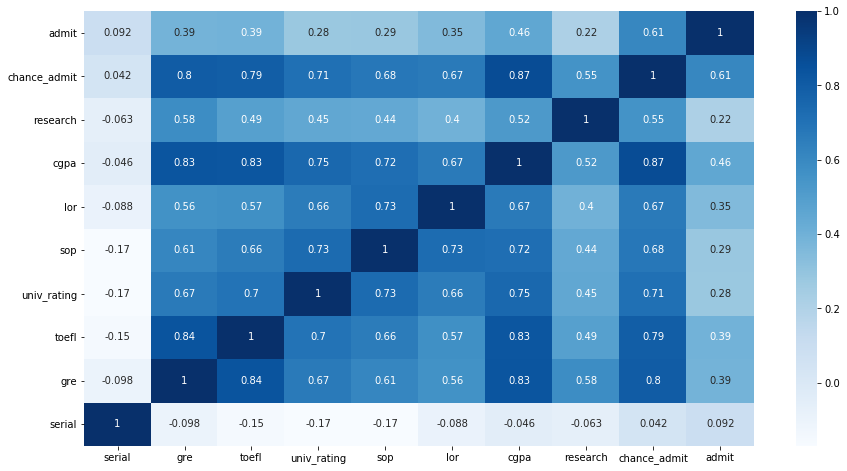

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 8))
hm   = sns.heatmap(admission.corr(), cmap="Blues", annot = True)
axes = hm.axes
axes.set_ylim(0, admission.corr().shape[0])
axes.set_ylim(0, admission.corr().shape[1])

In [28]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split

x = admission.iloc[:, :-3].values
y = admission['admit'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  2.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  3.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [399.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [400.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [29]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#predicting for the entire dataset
pred  = logisticRegr.predict(x_test)

#determining the accuracy of the model
score = logisticRegr.score(x_test, y_test)
score

0.925

In [31]:
index = 0
mispredictIndex = []

for predict, actual in zip(pred, y_test) :
    if predict != actual :
        mispredictIndex.append(index)
        print(index, " | ", predict, " | ", actual)        
    index += 1

5  |  1  |  0
15  |  1  |  0
23  |  1  |  0
46  |  1  |  0
61  |  1  |  0
79  |  1  |  0
